# Best pair search

Realizando 20 rodadas de classificação com `SVC` no dataset `chb01dwt` para determinar com qual canal se obtém o melhor par para o canal 16 os melhores resultados.

## Importando biblioteca

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Carregando dados

In [2]:
chb_dwt_df = pd.read_csv('./chb01dwt.csv')

target_dwt_s = chb_dwt_df.pop('target')

random_seeds = np.random.randint(0, 9000, 20)

random_seeds

array([1206,  591, 1382, 8135, 5675, 4408, 3176, 1275, 2558, 1819, 8918,
        520, 8390,  438, 8796, 6861, 5848, 4316, 1032, 1209])

## Realizando classificação com pares

Utilizando apenas pares entre o canal 16, que se saiu melhor no teste anterior, e os demais canais.

In [3]:
range_without_16 = [par for par in range(18) if par != 16]

channels_df = pd.DataFrame(columns=[f'{i}-16' for i in range_without_16])

for pair in range_without_16:

    columns_channel_pair =[column for column in chb_dwt_df.columns if (f'{pair}' in column.split('-'))]
    columns_channel_sixteen = [column for column in chb_dwt_df.columns if (f'16' in column.split('-'))]

    pair_of_columns = columns_channel_pair + columns_channel_sixteen

    # X recebe apenas as colunas relacionadas aos pares de canais da iteração
    X = chb_dwt_df[pair_of_columns].values
    y = target_dwt_s.values

    channel_acc = []
    for seed in random_seeds:
        # Separando dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Pré-processando dados
        std_scaler = StandardScaler().fit(X_pre_train)

        X_train = std_scaler.transform(X_pre_train)
        X_test = std_scaler.transform(X_pre_test)

        # Instanciando classificador
        classifier = SVC(cache_size=500).fit(X_train, y_train)

        # Salvando acurácia da classificação
        channel_acc.append(classifier.score(X_test, y_test))
    
    channels_df[f'{pair}-16'] = channel_acc

channels_df

,0-16,1-16,2-16,3-16,4-16,5-16,6-16,7-16,8-16,9-16,10-16,11-16,12-16,13-16,14-16,15-16,17-16
0,0.976923,0.992308,0.984615,0.992308,0.984615,1.000000,0.992308,1.000000,0.984615,0.984615,0.992308,0.984615,0.984615,0.976923,0.992308,0.984615,1.000000
1,0.992308,0.984615,0.984615,0.984615,0.992308,0.992308,0.984615,0.992308,0.992308,0.992308,0.976923,0.992308,0.992308,0.992308,0.992308,0.992308,0.992308
2,0.992308,0.992308,0.992308,0.984615,0.992308,1.000000,1.000000,0.992308,0.984615,1.000000,1.000000,0.984615,0.992308,0.984615,0.992308,0.992308,0.992308
3,0.992308,0.992308,0.969231,0.984615,0.976923,0.992308,0.984615,0.984615,0.992308,0.976923,0.976923,0.984615,0.992308,0.984615,0.984615,0.992308,0.984615
4,0.992308,1.000000,1.000000,1.000000,0.992308,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992308,1.000000,0.992308,1.000000
5,1.000000,1.000000,0.992308,1.000000,1.000000,1.000000,0.992308,1.000000,1.000000,1.000000,0.992308,1.000000,1.000000,1.000000,1.000000,1.000000,0.992308
6,1.000000,1.000000,0.984615,0.992308,0.992308,0.992308,0.992308,0.984615,1.000000,0.992308,0.984615,1.000000,1.000000,1.000000,1.000000,0.992308,0.992308
7,1.000000,1.000000,0.992308,1.000000,1.000000,1.000000,0.992308,1.000000,0.992308,1.000000,1.000000,1.000000,0.992308,0.992308,1.000000,0.976923,0.984615
8,0.992308,1.000000,0.992308,1.000000,0.992308,1.000000,0.992308,1.000000,1.000000,1.000000,0.992308,1.000000,1.000000,1.000000,0.992308,0.992308,0.992308
9,0.992308,0.984615,0.976923,0.976923,0.984615,0.992308,0.984615,0.992308,0.992308,0.992308,0.976923,0.992308,0.992308,0.992308,0.992308,1.000000,0.976923


,count,mean,std,min,25%,50%,75%,max
5-16,20.0,0.995769,0.005840,0.984615,0.992308,1.000000,1.000000,1.0
12-16,20.0,0.995000,0.004516,0.984615,0.992308,0.992308,1.000000,1.0
1-16,20.0,0.994615,0.006164,0.984615,0.992308,0.996154,1.000000,1.0
14-16,20.0,0.993846,0.006412,0.984615,0.990385,0.992308,1.000000,1.0
15-16,20.0,0.993846,0.006412,0.976923,0.992308,0.992308,1.000000,1.0
8-16,20.0,0.993462,0.006252,0.984615,0.990385,0.992308,1.000000,1.0
0-16,20.0,0.993077,0.006556,0.976923,0.992308,0.992308,1.000000,1.0
11-16,20.0,0.992308,0.006603,0.984615,0.984615,0.992308,1.000000,1.0
13-16,20.0,0.992308,0.007059,0.976923,0.984615,0.992308,1.000000,1.0
7-16,20.0,0.991923,0.008815,0.969231,0.984615,0.992308,1.000000,1.0


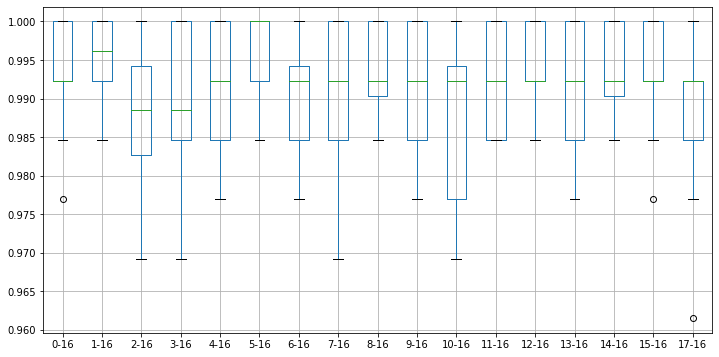

In [5]:
channels_df.boxplot(figsize=(12, 6))
channels_df.describe().transpose().sort_values(by='mean', ascending=False)